## INDIA AIR QUALITY DATA ANALYSIS, VISUALISATION AND PREDICTION

The Air Quality Index (AQI) is a statistic for assessing the quality of the air in our immediate surroundings. It measures how air pollution can affect an individual’s health within a specified period of time. The common air pollutants are Particulate Matter (PM2.5, PM10), Nitrogen Dioxide (NO2) Carbon Monoxide (CO), Sulphur Dioxide (SO2) and Ozone (O3).This project was to evaluate and investigate condition and quality of the air by measuring Air Quality Index (AQI) for the development of environment. This study was carried out based on measuring four major air pollutants such as PM10, PM2.5, SO2 and NO2 with various ambiance conditions during January 2015 to July 2020 After a preliminary study of the available algorithms and data review, it became apparent that the problem fell under the linear regression category. The major discovery is that the machine learning approach should be suitable for these types of problems due to many aspects. We developed a model to predict the air quality index based on historical data of previous years and predicting over a particular upcoming year as a Gradient decent boosted multivariable regression problem

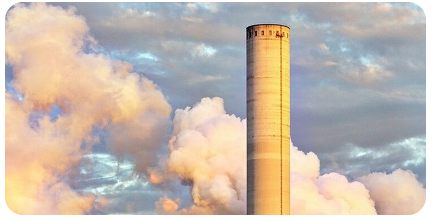

### ▶️Step 1) Importing necessary Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from datetime import datetime
import warnings
warnings.filterwarnings("ignore")

In [ ]:
from pywaffle import Waffle
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from plotly.offline import init_notebook_mode, iplot
from bubbly.bubbly import bubbleplot

### ▶️Step 2) Reading and Understanding the Data

In [ ]:
df=pd.read_csv("C:/Users/HP/Documents/Eduverse topics/Reg_ML/city_day.csv",parse_dates=True)

In [ ]:
df['Date']=pd.to_datetime(df['Date'])

In [ ]:
df.head()

In [ ]:
df.info()

In [ ]:
df.describe()

In [ ]:
grp_state=df.groupby(['City'])

In [ ]:
def impute_mean_by_state(series):
    return series.fillna(series.mean())

In [ ]:
df['PM2.5']=grp_state['PM2.5'].transform(impute_mean_by_state)  #fill value with mean value group by state
df['PM10']=grp_state['PM10'].transform(impute_mean_by_state)
df['NO2']=grp_state['NO2'].transform(impute_mean_by_state)
df['NO']=grp_state['NO'].transform(impute_mean_by_state)
df['NOx']=grp_state['NOx'].transform(impute_mean_by_state)
df['NH3']=grp_state['NH3'].transform(impute_mean_by_state)  #fill value with mean value group by state
df['CO']=grp_state['CO'].transform(impute_mean_by_state)
df['SO2']=grp_state['SO2'].transform(impute_mean_by_state)
df['O3']=grp_state['O3'].transform(impute_mean_by_state)
df['Benzene']=grp_state['Benzene'].transform(impute_mean_by_state)
df['Toluene']=grp_state['Toluene'].transform(impute_mean_by_state)
df['Xylene']=grp_state['Xylene'].transform(impute_mean_by_state)
df['AQI']=grp_state['AQI'].transform(impute_mean_by_state)

In [ ]:
AQI_levels=pd.DataFrame(df['AQI_Bucket'].value_counts()).to_dict()['AQI_Bucket']

In [ ]:
AQI_levels

In [ ]:
# plot
fig = plt.figure(
    title={
        'label': 'Day-wise AQI levels across Indian cities from 2015-2020 (Scaled Representation)\nTotal Records:29531\n',
        'loc': 'left',
        'fontdict': {
            'fontsize': 15,
        }
    },
    FigureClass=Waffle, 
    rows=15, 
    columns=30,
    values=AQI_levels, 
    colors=['#00b050', '#91cf4f', "#fefe00", "#ffbf00", "#fe0000", "#bf0000"],
    labels=[f"{k} ({round((v/df.shape[0]*100),2)}%)" for k, v in AQI_levels.items()],
    #legend={'loc': 'upper left', 'bbox_to_anchor': (1.1, 1)},
    legend={
        # 'labels': [f"{k} ({v}%)" for k, v in data.items()],  # lebels could also be under legend instead
        'loc': 'lower left',
        'bbox_to_anchor': (0, -0.2),
        'ncol': 4,
        'framealpha': 0,
        'fontsize': 12
    },
    block_arranging_style='style',
    figsize=(10, 20),
    starting_location='NW',
    vertical=False,
)
# show plot
plt.show()

### ▶️Step 3) Exploratory Data Analysis (EDA)

In [ ]:
sns.heatmap(df.corr(), annot=True, cmap='RdBu')   # due to high corr e remove 
plt.show()


In [ ]:
df.isnull().sum()   #Toluene  #NOx remove

In [ ]:
df.drop(columns=['Toluene','NOx'],inplace=True)

In [ ]:
data_state_Wise= pd.DataFrame(df['City'].value_counts()).sort_values(by='City', ascending=True).to_dict()['City']

In [ ]:
keys = data_state_Wise.keys()
values = data_state_Wise.values()
plt.barh(list(keys), list(values))
plt.show()

In [ ]:
count= df.groupby(['City','AQI_Bucket']).count().reset_index()

In [ ]:
good=count.loc[count['AQI_Bucket']=='Good']
Moderate=count.loc[count['AQI_Bucket']=='Moderate']
Poor=count.loc[count['AQI_Bucket']=='Poor']
Satisfactory=count.loc[count['AQI_Bucket']=='Satisfactory']
Severe=count.loc[count['AQI_Bucket']=='Severe']
Very_Poor=count.loc[count['AQI_Bucket']=='Very Poor']

In [ ]:
palette = sns.color_palette("rainbow", 8)
plt.figure(figsize=(20,20))
plt.subplot(3,2,1)
sns.barplot(data=good,x=good['City'],y=good['Date'], palette=palette)
plt.xticks(rotation = 60)
plt.xlabel('City'), plt.ylabel('Days')
plt.title("Good Days in the City", fontsize=14), plt.xticks(fontsize=14), plt.yticks(fontsize=14)


plt.subplot(3,2,2)
sns.barplot(data=Moderate,x=Moderate['City'],y=Moderate['Date'], palette=palette)
plt.xticks(rotation = 60)
plt.xlabel('City'), plt.ylabel('Days')
plt.title("Moderate days in City", fontsize=14), plt.xticks(fontsize=14), plt.yticks(fontsize=14)


plt.subplot(3,2,3)
sns.barplot(data=Poor,x=Poor['City'],y=Poor['Date'], palette=palette)
plt.xticks(rotation = 60)
plt.xlabel('City'), plt.ylabel('Days')
plt.title("Poor days in City", fontsize=14), plt.xticks(fontsize=14), plt.yticks(fontsize=14)


plt.subplot(3,2,4)
sns.barplot(data=Satisfactory,x=Satisfactory['City'],y=Satisfactory['Date'], palette=palette)
plt.xticks(rotation = 60)
plt.xlabel('City'), plt.ylabel('Days')
plt.title("Satisfactory days in City", fontsize=14), plt.xticks(fontsize=14), plt.yticks(fontsize=14)


plt.subplot(3,2,5)
sns.barplot(data=Severe,x=Severe['City'],y=Severe['Date'], palette=palette)
plt.xticks(rotation = 60)
plt.xlabel('City'), plt.ylabel('Days')
plt.title("Severe days in city", fontsize=14), plt.xticks(fontsize=14), plt.yticks(fontsize=14)


plt.subplot(3,2,6)
sns.barplot(data=Very_Poor,x=Very_Poor['City'],y=Very_Poor['Date'], palette=palette)
plt.xticks(rotation = 60)
plt.xlabel('City'), plt.ylabel('Days')
plt.title("Very_Poor days in City", fontsize=14), plt.xticks(fontsize=14), plt.yticks(fontsize=14)


plt.tight_layout()
plt.show()

In [ ]:
cities=pd.unique(df['City'])

column1=cities+'_AQI'
column2=cities+'_AQI_Bucket'
columns=[*column1,*column2]

In [ ]:
final_df=pd.DataFrame(index=np.arange('2015-01-01','2020-07-02',dtype='datetime64[D]'),columns=column1)
for city,i in zip(cities,final_df.columns):
    n=len(np.array(df[df['City']==city]['AQI']))
    final_df[i][-n:]=np.array(df[df['City']==city]['AQI'])

In [ ]:
final_df=final_df.astype('float64')
final_df=final_df.resample(rule='MS').mean()

In [ ]:
final_df.head()

In [ ]:
final_df['India_AQI']=final_df.mean(axis=1)

In [ ]:
final_df.head()

In [ ]:
ax=final_df[['India_AQI']].plot(figsize=(12,8),grid=True,lw=2,color='Red')
ax.autoscale(enable=True,axis='both',tight=True)

In [ ]:
df_2019=final_df['2019-01-01':'2020-01-01']

In [ ]:
df_2019.isna().sum()

In [ ]:
df_2019=df_2019.drop(['Aizawl_AQI','Ernakulam_AQI','Kochi_AQI'],axis=1)
AQI_2019=df_2019.mean(axis=0)
AQI_2019

In [ ]:
plt.figure(figsize=(20,9))
plt.title('AQI for the year 2019')
plt.xticks(rotation=90)
bplot=sns.boxplot(data=df_2019,width=0.75,palette="GnBu_d")
plt.ylabel('AQI');
bplot.grid(True)

In [ ]:
plt.figure(figsize=(20,9))
plt.xticks(rotation=90)
plt.ylabel('AQI')
sns.barplot(AQI_2019.index,AQI_2019.values,palette="GnBu_d")

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
India_AQI=final_df['India_AQI']
result=seasonal_decompose(India_AQI,model='multiplicative')
result.plot();

In [ ]:
from matplotlib import dates
ax=result.seasonal.plot(xlim=['2018-01-01','2020-02-10'],figsize=(20,8),lw=2)
ax.yaxis.grid(True)
ax.xaxis.grid(True)

In [ ]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
sns.histplot(data=df,x='NO',kde=True,hue='AQI_Bucket')
plt.subplot(142)
sns.histplot(data=df,x='NO2',kde=True,hue='AQI_Bucket')
plt.subplot(143)
sns.histplot(data=df,x='Xylene',kde=True,hue='AQI_Bucket')
plt.show()

In [ ]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
sns.histplot(data=df,x='SO2',kde=True,hue='AQI_Bucket')
plt.subplot(142)
sns.histplot(data=df,x='NH3',kde=True,hue='AQI_Bucket')
plt.subplot(143)
sns.histplot(data=df,x='CO',kde=True,hue='AQI_Bucket')
plt.show()

In [ ]:
plt.subplots(1,2,figsize=(25,6))
plt.subplot(121)
sns.histplot(data=df,x='Benzene',kde=True,hue='AQI_Bucket')
plt.subplot(122)
sns.histplot(data=df,x='Xylene',kde=True,hue='AQI_Bucket')
plt.show()

In [ ]:
df.head().style.background_gradient(cmap = "autumn")

### 📈Step 4) Training a Regression Model

#### 1) Data Preparation

DataPreparation: 
The data preparation process entails cleaning as well as preparation of raw data from the business understanding 4.2.3 Data preprocessing Initially the data set contains noisy, inconsistent data and missing values. The data has to be preprocessed to remove the unwanted data and to make the data useful. Data preprocessing helps to transform data into useful format. The following steps were involved in data preprocessing. 
1) Data cleaning 

2) Data reduction

3) Data transformation 


In [ ]:
reg_df=df.copy()

In [ ]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

In [ ]:
reg_df.drop(['City','Date','AQI_Bucket'],axis=1,inplace=True)

In [ ]:
reg_df.dropna(inplace=True)

In [ ]:
X=reg_df.drop('AQI',axis=1)
y=reg_df['AQI']

In [ ]:
X=sc.fit_transform(X)

#### 2)Training and testing the model:

Firstly, we’ve collected the data set from kaggle. Then we performed data preprocessing techniques like data cleaning, data reduction on the data. At first the data related to the city Delhi is extracted. After that all the tuples which has missing values were ignored. Further data cleaning is performed for better and accurate results. Then data is split into two parameters which contains air particles composition in one parameter and AQI data in other parameter. We’ve considered PM 2.5, PM 10 and NO2 variables for predicting the AQI variable. 

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)
X_train.shape, X_test.shape

In [ ]:
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted)
    return mae, rmse, r2_square

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostRegressor
from sklearn.ensemble import BaggingRegressor
from xgboost import XGBRegressor
import warnings

In [ ]:
models = {
    "Linear Regression": LinearRegression(),
    "SVR": SVR(kernel='linear'),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "XGBRegressor": XGBRegressor(), 
    "CatBoosting Regressor": CatBoostRegressor(verbose=False),
    "AdaBoost Regressor": AdaBoostRegressor(),
    "BaggingRegressor": BaggingRegressor(base_estimator=DecisionTreeRegressor())
}
model_list = []
r2_list =[]

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train) # Train model

    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Evaluate Train and Test dataset
    model_train_mae , model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)

    model_test_mae , model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)

    
    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])
    
    print('Model performance for Training set')
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- R2 Score: {:.4f}".format(model_train_r2))

    print('----------------------------------')
    
    print('Model performance for Test set')
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2))
    r2_list.append(model_test_r2)
    
    print('='*35)
    print('\n')

### ▶️Model Evaluation

#### Cross-validation
###### What is cross-validation?

In cross-validation, we run our modeling process on different subsets of the data to get multiple measures of model quality.

###### When should you use cross-validation?

Cross-validation gives a more accurate measure of model quality, which is especially important if you are making a lot of modeling decisions. However, it can take longer to run, because it estimates multiple models (one for each fold).

So, given these tradeoffs, when should you use each approach?

For small datasets, where extra computational burden isn't a big deal, you should run cross-validation.
For larger datasets, a single validation set is sufficient. Your code will run faster, and you may have enough data that there's little need to re-use some of it for holdout.
There's no simple threshold for what constitutes a large vs. small dataset. But if your model takes a couple minutes or less to run, it's probably worth switching to cross-validation.

Alternatively, you can run cross-validation and see if the scores for each experiment seem close. If each experiment yields the same results, a single validation set is probably sufficient.


### 🧪Regression Evaluation Metrics

#### Here are three common evaluation metrics for regression problems:

Mean Absolute Error (MAE) is the mean of the absolute value of the errors:
    

Mean Squared Error (MSE) is the mean of the squared errors:
    

Root Mean Squared Error (RMSE) is the square root of the mean of the squared errors:
    

In [ ]:
pd.DataFrame(list(zip(model_list, r2_list)), columns=['Model Name', 'R2_Score']).sort_values(by=["R2_Score"],ascending=False)

In [ ]:
lin_model =CatBoostRegressor(verbose=False)
lin_model = lin_model.fit(X_train, y_train)
y_pred = lin_model.predict(X_test)
score = r2_score(y_test, y_pred)*100
print(" Accuracy of the model is %.2f" %score)

In [ ]:
evaluate_model(y_pred,y_test)

In [ ]:
pred_df=pd.DataFrame({'Actual Value':y_test,'Predicted Value':y_pred,'Difference':y_test-y_pred})
pred_df

### ▶️Improve model

From the above inference,we found CatBoostRegressor shows best R2 score whith high level of accuracy.The ﬁnal step in the process of appliedmachine learning before presenting results is algorithm tuning.It is sometimes called Hyperparameter optimization wherethe algorithm parameters are referred to as hyperparameterswhereas the coefﬁcients found by the machine learning al-gorithm itself are referred to as parameters. Optimizationsuggests the search-nature of the problem. There are differentsearch strategies to ﬁnd a good and robust parameter or set of parameters for an algorithm on a given problem. The onethat this paper focuses is Grid Search CV. Grid search is anapproach to parameter tuning that will methodically build andevaluate a model for each combination of algorithm parametersspeciﬁed in a grid. 

#### A. Estimator:

This is used to implement scikit-learn estimator inter-face.The classiﬁer that is to be trained is passed to thisparameter.

#### B. Parameter grid:

A python dictionary with parameter names as keys and listof parameter settings as values. All the combinations of theseparameters are tested to check the best accurac

In [ ]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'depth': [4, 6, 8],                     # Tree depth
    'learning_rate': [0.1, 0.01, 0.001],     # Learning rate
    'iterations': [100, 200, 300],           # Number of boosting iterations
    'l2_leaf_reg': [1, 3, 5],                # L2 regularization coefficient
    'random_seed': [42]                      # Random seed for reproducibility
}




In [ ]:
catboost_model = CatBoostRegressor()
grid_search = GridSearchCV(estimator=catboost_model, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)

In [ ]:
print("Best Hyperparameters:", grid_search.best_params_)

In [ ]:
clfR = CatBoostRegressor(depth=8, iterations=300, l2_leaf_reg= 1, learning_rate= 0.1, random_seed= 42)
clfR.fit(X_train,y_train)

In [ ]:
y_pred = clfR.predict(X_test)
score = r2_score(y_test, y_pred)*100
print(" Accuracy of the model is %.2f" %score)

In [ ]:
evaluate_model(y_pred,y_test)

In [ ]:
from sklearn import metrics 
print ("MAE:", metrics.mean_absolute_error (y_test, y_pred))

print ("RMSE:", np.sqrt(metrics.mean_squared_error (y_test, y_pred)))

In [ ]:
plt.scatter(y_test,y_pred);
plt.xlabel('Actual');
plt.ylabel('Predicted');

In [ ]:
sns.regplot(x=y_test,y=y_pred,ci=None,color ='red');

In [ ]:
# Create an array of indices to use as the x-axis (assuming sequential data)

plt.figure(figsize=(20,9))
x = range(len(y_test[:150]))

# Plot the actual target values in blue
plt.plot(x, y_test[:150], label='Actual', color='blue')

# Plot the predicted values in red
plt.plot(x, y_pred[:150], label='Predicted', color='red')

# Add labels and title
plt.xlabel('Data Points')
plt.ylabel('Target Values')
plt.title('Actual vs. Predicted in Regression Model')

# Show legend
plt.legend()

# Show the plot
plt.show()